This is the working notebook for the GW Project. based on https://iopscience.iop.org/article/10.3847/2041-8213/ab3800
and using software from https://www.gw-openscience.org/

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests, os

%config InlineBackend.figure_format = 'retina'

try:
    from gwpy.timeseries import TimeSeries
except:
    ! pip install -q gwpy
    from gwpy.timeseries import TimeSeries   

     |████████████████████████████████| 1.4MB 2.8MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 2.3MB 43.8MB/s 


Ordered roughly from smallest to most massive by source-frame chirp mass, the mergers considered in this paper are GW170608, GW151226, GW151012, GW170104, GW170814, GW170809, GW170818, GW150914, GW170823, and GW170729.



If we want to read in and analyze these, we need the times t0 which correspond to these events so that gwpy can fetch them. We would also want to decide the detector (i.e. Hannover or Livinngston etc)

Choose detector as H1, L1, or V1

GW170608  t0 = 1180922494.5

GW151226  t0 = 1135136350.6

GW151012  t0 = 1128678900.4

GW170104  t0 = 1167559936.6

GW170814  t0 = 1186741861.5

GW170809  t0 = 1186302519.8

GW170818  t0 = 1187058327.1

GW150914  t0 = 1126259462.4 

GW170823  t0 = 1187529256.5

GW170729  t0 = 1185389807.3



In [0]:
# Example: let's fetch one and look at it 

# -- Set a GPS time:
t0 = 1180922494.5 # --GW170608

#-- Choose detector as H1, L1, or V1
detector = 'H1'


In [4]:
from gwosc.locate import get_urls
url = get_urls(detector, t0, t0)[-1]

print('Downloading: ' , url)
fn = os.path.basename(url)
with open(fn,'wb') as strainfile:                 
    straindata = requests.get(url)
    strainfile.write(straindata.content)

Downloading:  https://www.gw-osc.org/catalog/GWTC-1-confident/data/GW170608/H-H1_GWOSC_4KHZ_R1-1180920447-4096.hdf5


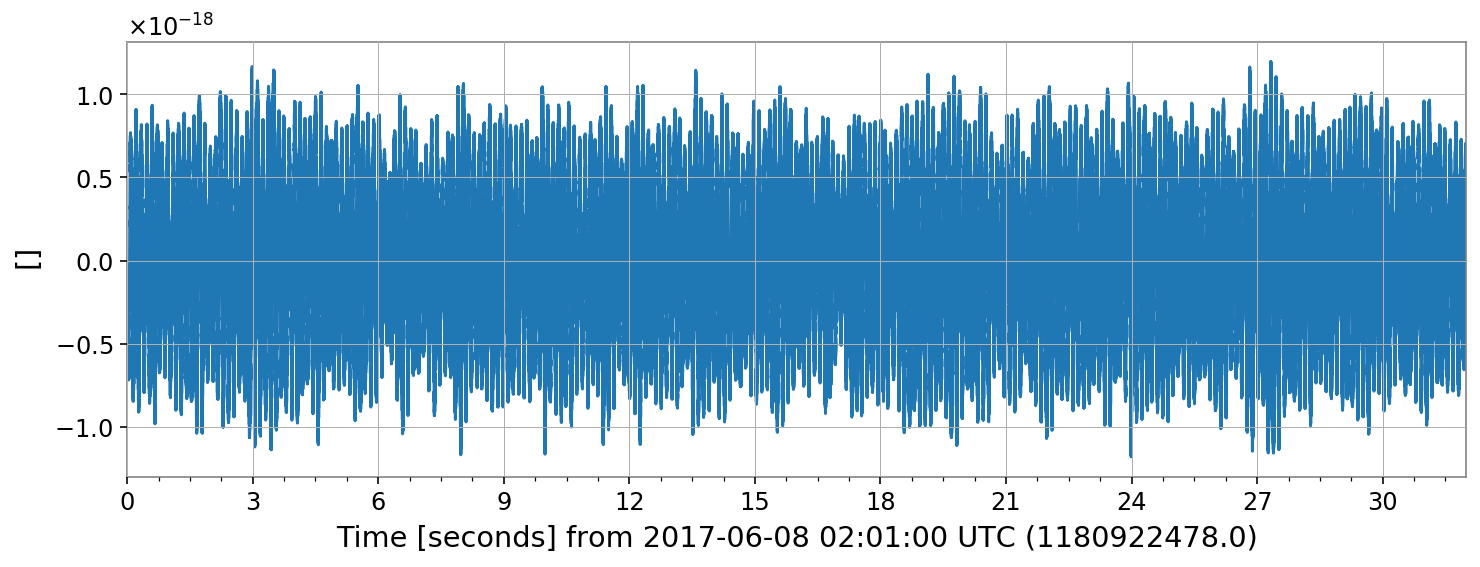

In [5]:
# -- Read the raw strain data
strain = TimeSeries.read(fn,format='hdf5.losc')
center = int(t0)
strain = strain.crop(center-16, center+16)
fig1 = strain.plot()

(1180922494.3, 1180922494.6)

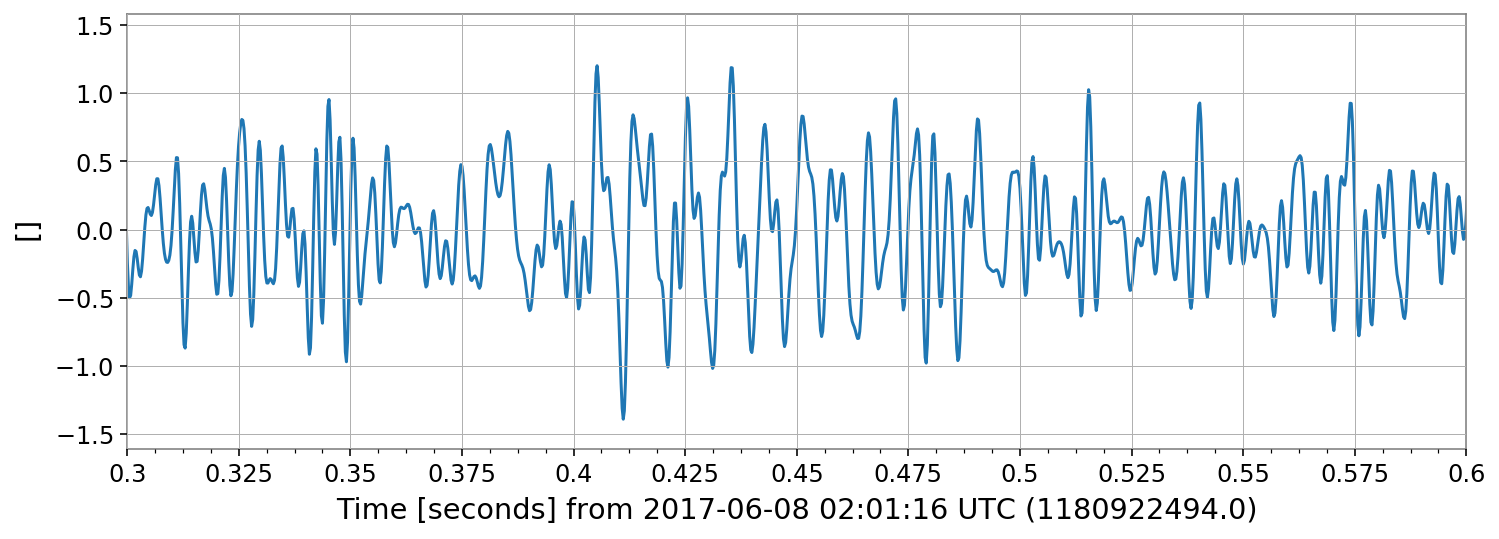

In [6]:
# -- Whiten and bandpass data
white_data = strain.whiten()
bp_data = white_data.bandpass(30, 400)
fig3 = bp_data.plot()
plt.xlim(t0-0.2, t0+0.1)

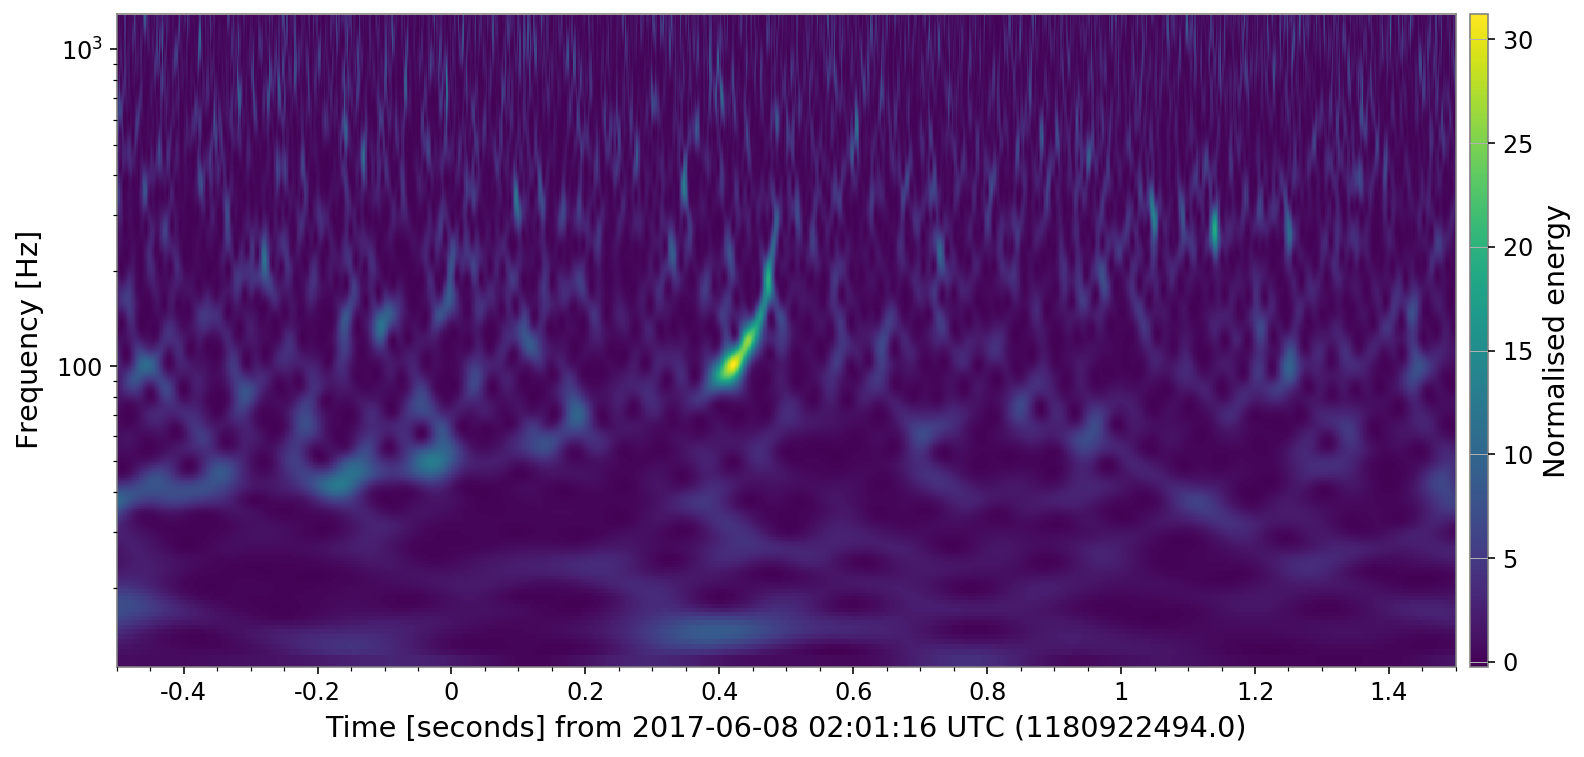

In [7]:
dt = 1  #-- Set width of q-transform plot, in seconds
hq = strain.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalised energy")
ax.grid(False)
ax.set_yscale('log')

Look here for json tables of data
https://www.gw-openscience.org/catalog/GWTC-1-confident/html/


In [8]:
!pip install wget


  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=f8ec878c1b86297b3bed459583d990848111bf1bc6b490d8a182430ddff1e64b
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [11]:
import wget
!wget -O confident_table.json https://www.gw-openscience.org/catalog/GWTC-1-confident/json/

--2019-11-15 16:25:02--  https://www.gw-openscience.org/catalog/GWTC-1-confident/json/
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19849 (19K) [text/plain]
Saving to: ‘confident_table.json’

confident_table.jso 100%[===================>]  19.38K  --.-KB/s    in 0.1s    

2019-11-15 16:25:03 (146 KB/s) - ‘confident_table.json’ saved [19849/19849]



In [12]:
!ls

confident_table.json  H-H1_GWOSC_4KHZ_R1-1180920447-4096.hdf5  sample_data


In [0]:
import pandas as pd

In [19]:
con_tab=pd.read_json('confident_table.json')
con_tab.columns
#con_tab.data=pd.DataFrame(con_tab.data.values.tolist())['name']
#con_tab.groupby(['date','name','number'])['data'].apply(','.join).reset_index()

Index(['data', 'parameters'], dtype='object')

In [20]:
con_tab.columns

Index(['data', 'parameters'], dtype='object')

In [22]:
con_tab['data'][1]

{'E_rad': {'best': 1.5, 'err': [-0.5, 0.5]},
 'L_peak': {'best': 3.2, 'err': [-1.7000000000000002, 0.8]},
 'a_final': {'best': 0.67, 'err': [-0.11, 0.13]},
 'chi_eff': {'best': 0.04, 'err': [-0.19, 0.28]},
 'distance': {'best': 1060.0, 'err': [-480.0, 540.0]},
 'far_cwb': {'best': 'NA'},
 'far_gstlal': {'best': 0.00792},
 'far_pycbc': {'best': 0.17},
 'mass1': {'best': 23.3, 'err': [-5.5, 14.0]},
 'mass2': {'best': 13.6, 'err': [-4.8, 4.1]},
 'mchirp': {'best': 15.2, 'err': [-1.1, 2.0]},
 'mfinal': {'best': 35.7, 'err': [-3.8, 9.9]},
 'redshift': {'best': 0.21, 'err': [-0.09, 0.09]},
 'sky_size': {'best': 1555.0},
 'snr_cwb': {'best': 'NA'},
 'snr_gstlal': {'best': 10.0},
 'snr_pycbc': {'best': 9.5},
 'tc': {'best': 1128678900.4},
 'utctime': {'best': '09:54:43.4'}}